## Test

### Set-up

In [2]:
# Packages
import geopandas as gpd
import rioxarray as rxr
import xugrid as xu
from resplotlib import rpc
from pathlib import Path

# Directories
dir_path_repo = next(p for p in Path.cwd().resolve().parents if p.name == "resplotlib")
dir_path_data = dir_path_repo / "data"

# Read data
da_bathymetry = rxr.open_rasterio(dir_path_data / "bathymetry.tif").squeeze().drop_vars("band")
ds_bathymetry = da_bathymetry.to_dataset(name="bathymetry")
da_image = rxr.open_rasterio(dir_path_data / "image.tif").squeeze()
uds_model = xu.open_dataset(dir_path_data / "model.nc")
gdf_points = gpd.read_file(dir_path_data / "points.geojson")
gdf_lines = gpd.read_file(dir_path_data / "lines.geojson")
gdf_polygons = gpd.read_file(dir_path_data / "polygons.geojson")

# Add a coordinate reference system (CRS)
uds_model.ugrid.set_crs("EPSG:32631")

In [3]:
rpc.set_guidelines(dir_path_data / "project_guidelines.json")

rpc.show_guidelines()

NameError: name 'uda_elevation' is not defined

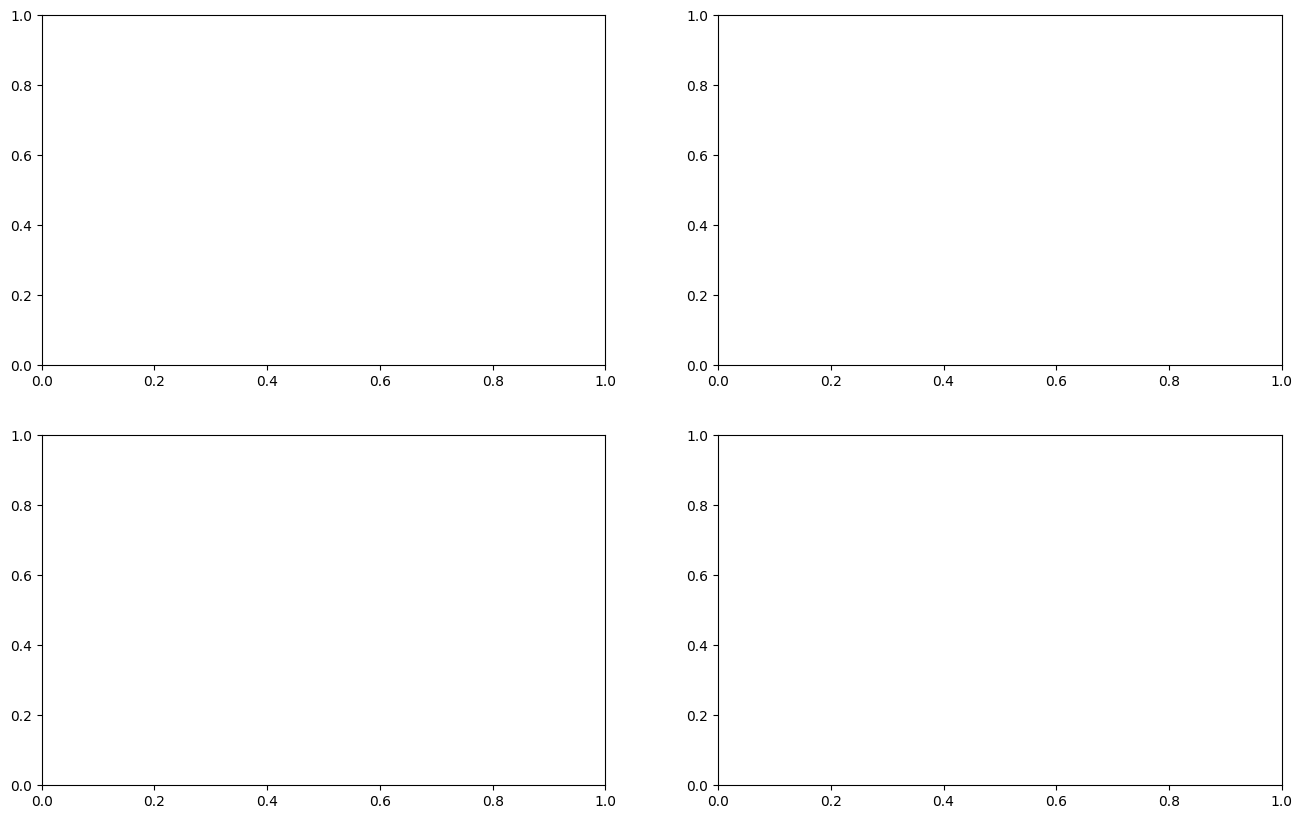

In [4]:
file_path_data = r"p:\archivedprojects\11209197-virtualclimatelab\01_data\Delft3D\wadsea_0000_map.nc"

uds = xu.open_dataset(file_path_data).isel(time=100)
uds.ugrid.set_crs("EPSG:28992")

da_bathymetry2 = da_bathymetry.isel(x=slice(None, None, 100), y=slice(None, None, 100))

fig, axs = rpc.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()
rpc.grid(uda=uda_elevation, ax=axs[0])
rpc.grid(uda=uds["mesh2d_u1"], ax=axs[1])
rpc.grid(uda=uds["mesh2d_ucx"], ax=axs[2])
rpc.grid(da=da_bathymetry2, ax=axs[3], style="grid")
rpc.show(fig)

### Static plotting

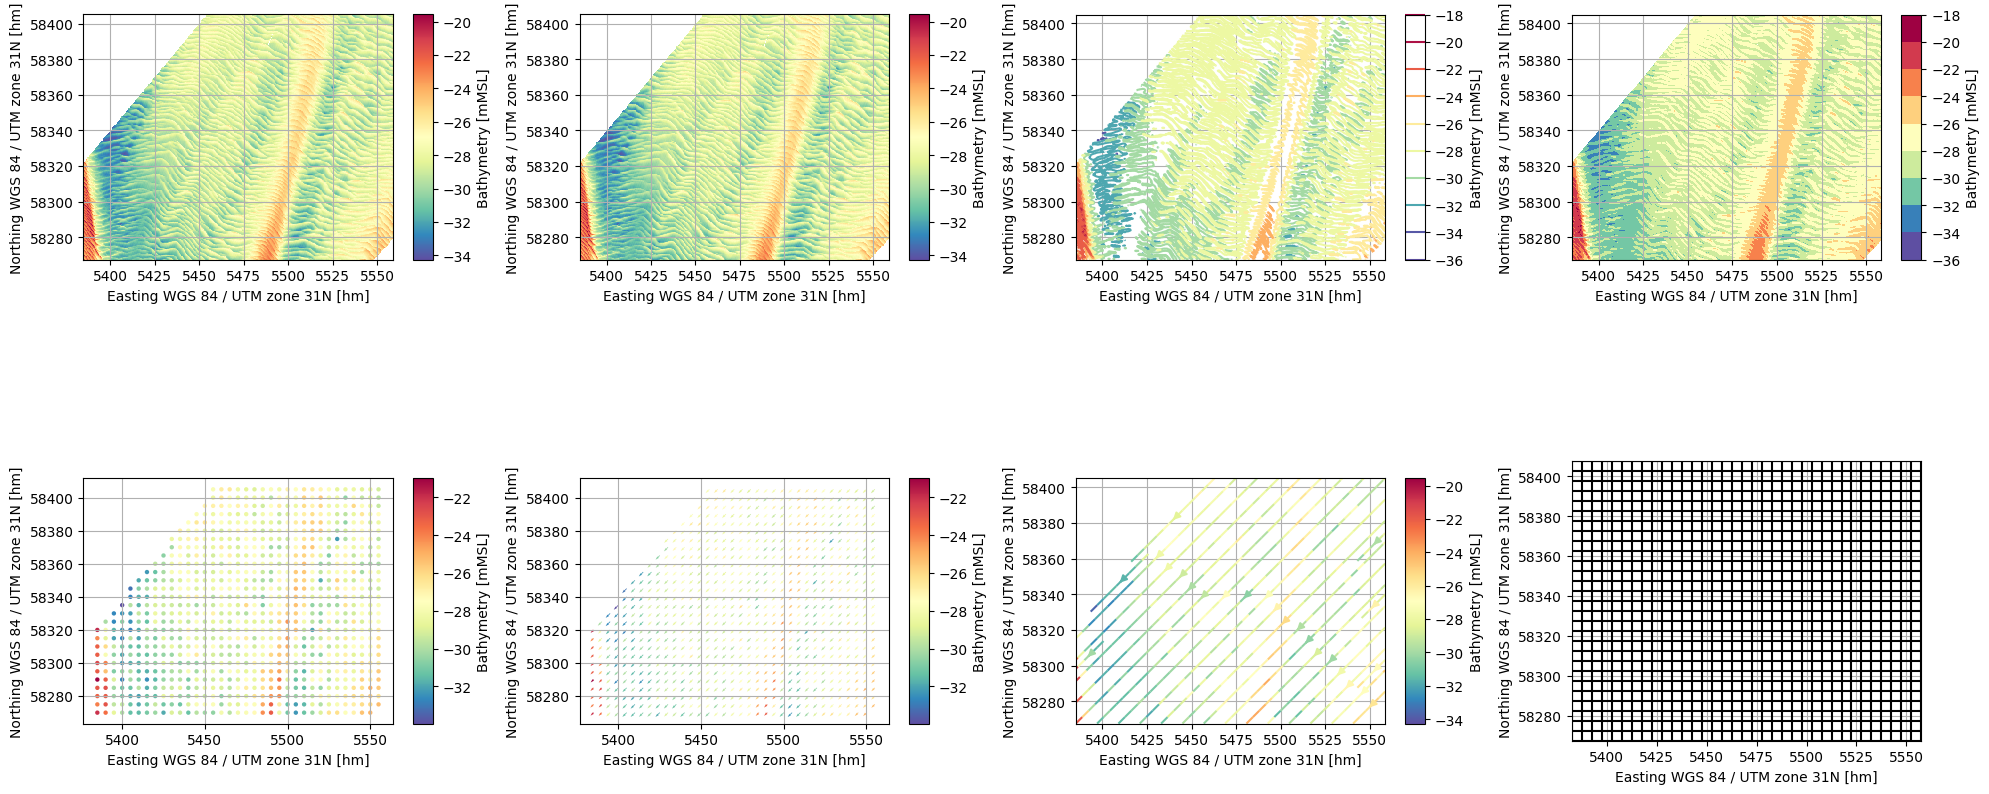

In [ ]:
# Initialise figure and axes
fig, axs = rpc.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

# Plot bathymetry
skip = 10
rpc.imshow(da=da_bathymetry, ax=axs[0], style="bathymetry", skip=skip)
rpc.pcolormesh(da=da_bathymetry, ax=axs[1], style="bathymetry", skip=skip)
rpc.contour(da=da_bathymetry, ax=axs[2], style="bathymetry", skip=skip, add_colorbar=True)
rpc.contourf(da=da_bathymetry, ax=axs[3], style="bathymetry", skip=skip)
rpc.scatter(ds=ds_bathymetry, ax=axs[4], style="bathymetry", skip=skip * 10, x="x", y="y", hue="bathymetry", s=10)
rpc.quiver(ds=ds_bathymetry, ax=axs[5], style="bathymetry", skip=skip * 10, x="x", y="y", u="bathymetry", v="bathymetry", hue="bathymetry")
rpc.streamplot(ds=ds_bathymetry, ax=axs[6], style="bathymetry", skip=skip, x="x", y="y", u="bathymetry", v="bathymetry", hue="bathymetry")
rpc.grid(da=da_bathymetry, ax=axs[7], style="default", skip=skip * 10)
rpc.show(fig)

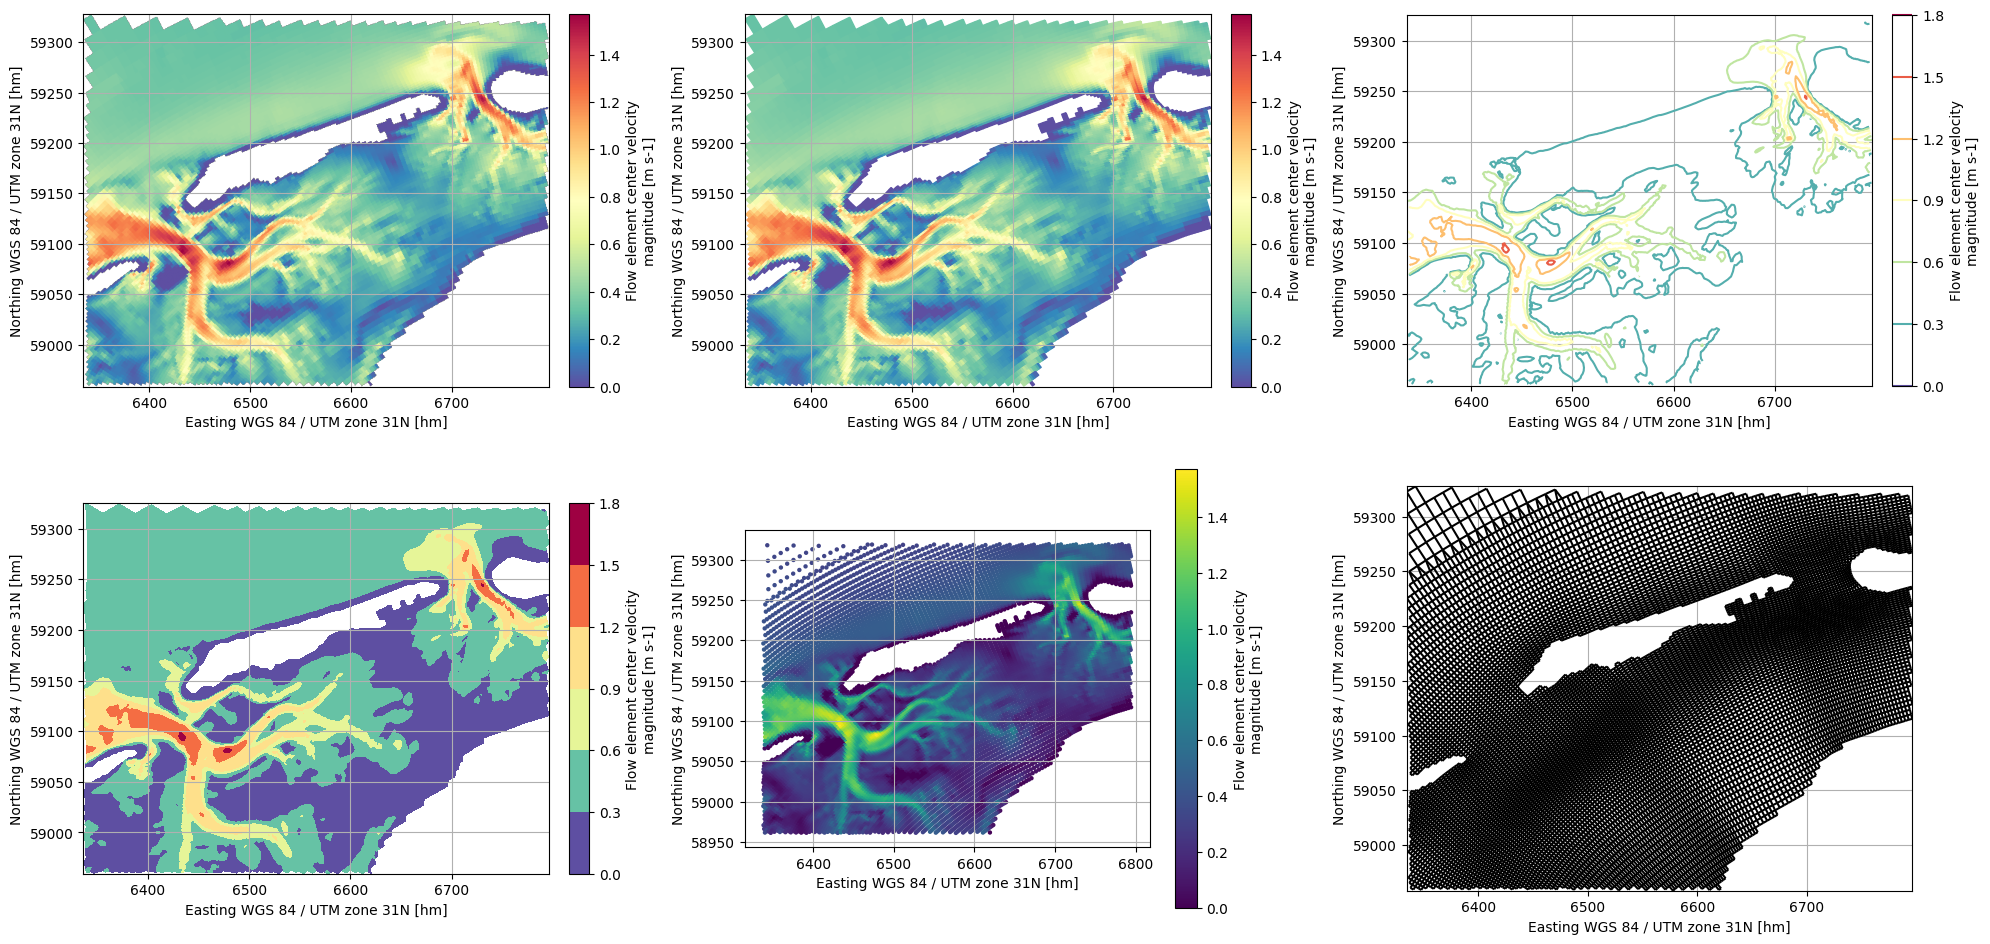

In [5]:
# Initialise figure and axes
fig, axs = rpc.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()

# Plot model
rpc.imshow(uda=uds_model["mesh2d_ucmag"], ax=axs[0], style="default")
rpc.pcolormesh(uda=uds_model["mesh2d_ucmag"], ax=axs[1], style="default")
rpc.contour(uda=uds_model["mesh2d_ucmag"], ax=axs[2], style="default", add_colorbar=True)
rpc.contourf(uda=uds_model["mesh2d_ucmag"], ax=axs[3], style="default")
rpc.scatter(uda=uds_model["mesh2d_ucmag"], ax=axs[4], style="default", s=10)
rpc.grid(uda=uds_model["mesh2d_ucmag"], ax=axs[5], style="default")
rpc.show(fig)

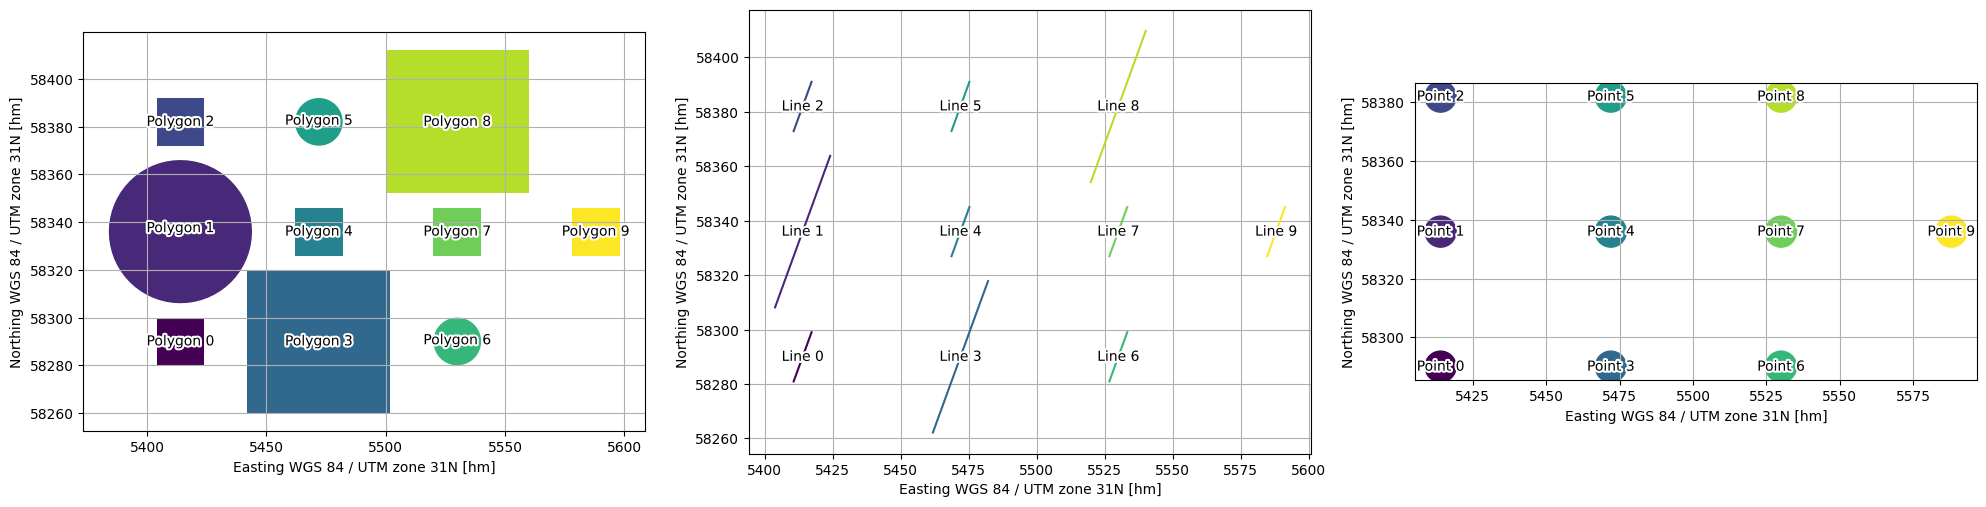

In [7]:
gdf_polygons["value"] = range(len(gdf_polygons))
gdf_polygons["label"] = [f"Polygon {i}" for i in range(len(gdf_polygons))]
gdf_lines["value"] = range(len(gdf_lines))
gdf_lines["label"] = [f"Line {i}" for i in range(len(gdf_lines))]
gdf_points["value"] = range(len(gdf_points))
gdf_points["label"] = [f"Point {i}" for i in range(len(gdf_points))]

fig, axs = rpc.subplots(1, 3, figsize=(20, 10))
axs = axs.flatten()
rpc.geometries(gdf=gdf_polygons, ax=axs[0], style="default", column="value", label_column="label")
rpc.geometries(gdf=gdf_lines, ax=axs[1], style="default", column="value", label_column="label")
rpc.geometries(gdf=gdf_points, ax=axs[2], style="default", s=500, column="value", label_column="label")
rpc.show(fig)

### Interactive plotting

In [9]:
# Initialise map
m = rpc.Map()

# Plot bathymetry
m = rpc.explore_data(da=da_bathymetry, m=m, style="bathymetry", name="Bathymetry")

# Plot image
m = rpc.explore_data(da=da_image, m=m, style="image", name="Image")

# Plot elevation
m = rpc.explore_data(da=uda_elevation, m=m, name="Elevation")

# Plot geometries
m = rpc.explore_geometries(gdf=gdf_lines, m=m, style_kwargs={"color": "green", "weight": 2}, name="Lines")
m = rpc.explore_geometries(gdf=gdf_points, m=m, style_kwargs={"color": "blue", "weight": 2}, name="Points")

# Plot basemaps
m = rpc.explore_basemap(m=m, style="satellite")

# Save and show map
rpc.show(m)

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
# Get view bounds
print("View bounds:", m.get_view_bounds())

# Get view zoom
print("View zoom:", m.get_view_zoom())

# Get drawn geometries
gdf_drawn = m.get_drawn_geometries()

# Show drawn geometries
gdf_drawn.head()